In [1]:
def hat_process(hat):#Thie is the program for enumerate all the conditions by realizing the process that the question defines
    if len(hat)==1:
        return [hat[0]]
    last_number = [] 
    for i in range (len(hat)):
        for j in range (i+1,len(hat)):#as I taken the first number, second number will be bigger than this in hence to traverse all possibilities
            a=hat[i]
            b=hat[j]
            new_number=abs(a-b)
            new_hat=hat[0:i]+hat[i+1:j]+hat[j+1:len(hat)]#I can form a new list here therefore convient to enumerate(use del straightly may cause error)
            new_hat.append(new_number)
            last_number.extend(hat_process(new_hat))
    return last_number 
# Now I need to classification and provides the corresponding possibilities. 
from collections import Counter
from fractions import Fraction# Since straightly division will give float, I need to induce code to make the float become fraction
hat=[]
u=0
n=int(input('Please input the maximum number in the hat(0)(Due to the effeciency problem, n<=8)')) 
for i in range (1,n+1):
    u=u+i
    hat.append(i)
print('hat(0)=',hat,'sum(hat(0))=',u)

def total_condition(n):
    initial=1
    for k in range (2,n+1):
        initial=initial*(k*(k-1)//2)
    return initial

def classfier(hat):
    mean=0
    Count=Counter(hat_process(hat))
    print(Count)
    for r in range(n+1):
        probability=Count[r]/total_condition(n)
        mean=mean+r*probability
        print('The probability of ',r,':',probability)
    print('Mean',mean)
classfier(hat)

#Then I can do some statistic about the last_number:

import numpy as np
from scipy import stats
mean=np.mean(hat_process(hat))
median=np.median(hat_process(hat))
mode=stats.mode(hat_process(hat), keepdims=False)
var=np.var(hat_process(hat), ddof =1)
print('The corresponding detils in statistic:,''Median',median,'Mode',mode,'Var',var)

Please input the maximum number in the hat(0)(Due to the effeciency problem, n<=8)9
hat(0)= [1, 2, 3, 4, 5, 6, 7, 8, 9] sum(hat(0))= 45
Counter({1: 26584504, 3: 17078968, 5: 9180832, 7: 3755496, 9: 553800})
The probability of  0 : 0.0
The probability of  1 : 0.4651413734217967
The probability of  2 : 0.0
The probability of  3 : 0.2988257607569777
The probability of  4 : 0.0
The probability of  5 : 0.16063436074018084
The probability of  6 : 0.0
The probability of  7 : 0.06570882674057277
The probability of  8 : 0.0
The probability of  9 : 0.009689678340471991
Mean 2.711959351641891
The corresponding detils in statistic:,Median 3.0 Mode ModeResult(mode=1, count=26584504) Var 3.820305236490283


Please input the maximum number in the hat(0)(Due to the effeciency problem, n<=8)2025
Please input how many times of random process you want)1000
hat(0)= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 19

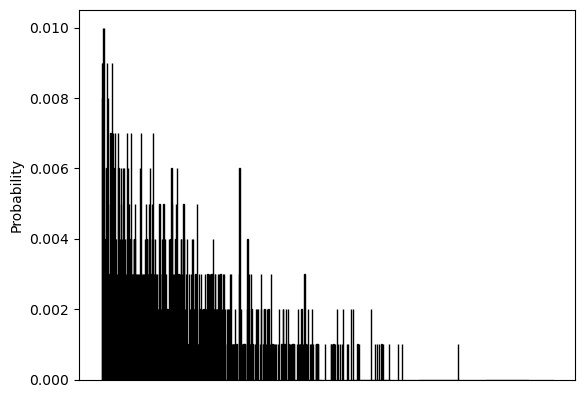

In [1]:
import random

def hat_process(hat):# recover by randomness, from the enumeration
    last_number=[]
    while len(hat)>1:
        i,j=random.sample(range(len(hat)),2)#choose 2 different positions of number randomly
        a=hat[i]
        b=hat[j]
        new_number=abs(a-b)
        if i>j:
            i,j=j,i#change the position of i and j if i>j
        hat=hat[0:i]+hat[i+1:j]+hat[j+1:len(hat)]#This time to use this forming new list, I need to take i<j by the code above
        hat.append(new_number)
    return hat[0]
# Above part successfully run the process randomly for 1 times , I would like the code run thousands times on [1,2,....,2025] automatically

def automatically(hat,times):
    last_number_set=[]
    for i in range (times):
        last_number_set.append(hat_process(hat))
    return last_number_set

n=int(input('Please input the maximum number in the hat(0)')) 
times=int(input('Please input how many times of random process you want)')) 
hat=[]
u=0
for i in range (1,n+1):
    u=u+i
    hat.append(i)
print('hat(0)=',hat,'sum(hat(0))=',u)

#Unlike by enumeration, I have enough datas to draw the graph.

from collections import Counter
import matplotlib.pyplot as plt
def classfier_and_sketching(hat,times):
    mean=0
    probability_set=[]
    Count=Counter(automatically(hat,times))
    print(Count)
    for r in range(n+1):
        probability=Count[r]/times
        mean=mean+r*probability
        probability_set.append(probability)
        print('The probability of ',r,':',probability)
    print('With mean:',mean)
    
#Now I can sketch the randomness graph

    xs = list(range(n+1))
    ys = probability_set
    plt.bar(xs, ys, color='skyblue', edgecolor='black', width=0.8)
    plt.xticks([])#Too many datas on x-axis, so remove them
    plt.ylabel('Probability')
    plt.show()
    

classfier_and_sketching(hat,times)
